<a href="https://colab.research.google.com/github/natcruuz/Valores-At-picos/blob/main/Actividad3_valores_at%C3%ADpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerías pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

In [10]:
#Carga desde un archivo .csv sin índice
data = pd.read_csv("Ventas_totales_sin_nulos.csv")
data.head(5)

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


In [11]:
#Corroboramos valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

Unnamed: 0                             0
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros           

In [ ]:
#Eliminamos la primera columna
#Eliminar columna innecesarias
data1 = data.drop(["Unnamed: 0"], axis = 1)
data1

**PROCEDIMIENTO PARA SEPARAR DATA FRAME EN PARTES (CUANTITATIVAS Y CUALITATIVAS)**

Sólo nos interesa trabajar con las variables cuantitativas.

In [20]:
#Verificamos información del data frame para saber el tipo de datos que tenemos
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        65 non-null     object 
 1   ventas_precios_corrientes            65 non-null     float64
 2   ventas_precios_constantes            65 non-null     float64
 3   ventas_totales_canal_venta           65 non-null     float64
 4   salon_ventas                         65 non-null     float64
 5   canales_on_line                      65 non-null     float64
 6   ventas_totales_medio_pago            65 non-null     float64
 7   efectivo                             65 non-null     float64
 8   tarjetas_debito                      65 non-null     float64
 9   tarjetas_credito                     65 non-null     float64
 10  otros_medios                         65 non-null     float64
 11  ventas_totales_grupo_articulos    

A continuación aplicamos un filtro para obtener las variables cuantitativas y cualitativas


In [ ]:
#Filtro para obtener las variables cuantitativas
cuantitativas = data1.iloc[:,1:24]
cuantitativas

In [ ]:
#Filtro para obtener las variables cuantitativas
cualitativas = data1.iloc[:,0]
cualitativas

Con el siguiente código se realiza un diagrama de código y bigote de cada columna del data frame con el fin de observar los valores atípicos.

<Figure size 1500x800 with 0 Axes>

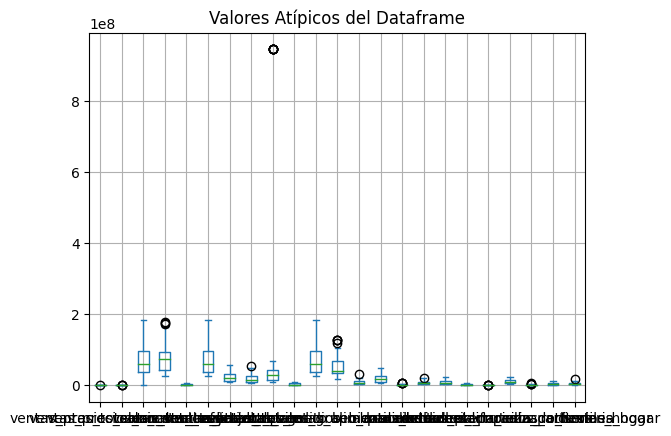

In [67]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=True)
plt.title("Valores Atípicos del Dataframe")
plt.grid() #cuadriculamos la gráfica
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO DE DESVIACIÓN ESTÁNDAR PARA ELIMINAR OUTLIERS EN EL DATAFRAME**

Lo que sigue es aplicar desviación estándar al conjunto de datos para determinar aquellos valores atípicos. El código siguiente determina el límite superior y el límite inferior en el que se encuentra el rango de datos permitidos; cada límite está determinado a partir de la media, 3 desviaciones estándar. Aquellos datos que se salgan de los límites serán los valores "outliers".

In [ ]:
#Método aplicando desviación estándar
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Límite superior permitido", Limite_Superior)
print("Límite inferior permitido", Limite_Inferior)

A continuación se convierten los valores atípicos en valores nulos.

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
Datos_sin_Outliers= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_Outliers

In [70]:
#Corroboramos que hay valores nulos
valores_nulos = Datos_sin_Outliers.isnull().sum()
valores_nulos

ventas_precios_corrientes              0
ventas_precios_constantes              2
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    1
electronicos_articulos_hogar           0
otros                                  1
dtype: int64

Después de que se verificó que los valores outliers se convirtieron en nulos, se procede a sustituir estos últimos por datos que no sean nulos con alguno de los métodos revisados en la actividad anterior.

In [ ]:
#Reemplazamos los valores atípicos (nulos) con el promedio de datos
data_clean = Datos_sin_Outliers.copy()
data_clean = data_clean.fillna(round(Datos_sin_Outliers.mean(),1))
data_clean

In [72]:
#Corroboramos los valores nulos
valores_nulos = data_clean.isnull().sum()
valores_nulos

ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATA FRAME**


El siguiente método ocupa rangos intercuartiles para determinar los valores outliers

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

En la siguiente sección de código se seleccionan aquellos datos que están dentro del rango permitido.

In [ ]:
#Obtenemos datos limpios del Dataframe
Datos_sin_Outliers_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Datos_sin_Outliers_iqr

In [75]:
#Corroboramos valores nulos
valores_nulos=Datos_sin_Outliers_iqr.isnull().sum()
valores_nulos

ventas_precios_corrientes              1
ventas_precios_constantes              3
ventas_totales_canal_venta             0
salon_ventas                           3
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        1
tarjetas_credito                       7
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      4
bebidas                                1
almacen                                0
panaderia                              4
lacteos                                1
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         4
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    4
electronicos_articulos_hogar           0
otros                                  1
dtype: int64

Todos los valores atípicos (nulos) se reemplazan con el promedio de cada conjunto de datos.

In [ ]:
#Realizamos una copia del dataframe
data_clean_iqr=Datos_sin_Outliers_iqr.copy()
data_clean_iqr=data_clean_iqr.fillna(round(Datos_sin_Outliers_iqr.mean(),1))
data_clean_iqr

In [82]:
#Corroboramos los valores nulos
valores_nulos = data_clean_iqr.isnull().sum()
valores_nulos

ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

**UNIÓN DE DATA FRAME CUALITATIVO CON DATAFRAME CUANTITATIVO**

Unimos los datos cuantitativos con los cualitativos. En este caso seleccioné el conjunto de valores obtenido mediante el procedimiento de desviación estándar.

In [ ]:
Dataframe_final = pd.concat([cualitativas, data_clean], axis=1)
Dataframe_final

**DESCARGAR DATAFRAME PROCESADO**

In [84]:
#Convertir DataFrame a CSV
Dataframe_final.to_csv("Dataframe_procesado.csv")

In [81]:
#Descargar el archivo procesado
from google.colab import files
files.download("Dataframe_procesado.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>